<a href="https://colab.research.google.com/github/ghrbarbosa/analise_sim_ideb_bd-/blob/main/BaseDosDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Exite correlação entre mortalidade e educação nos municípios?**

---

O processo de **desenvolvimento** de um município se dá por muitos fatores, como **atividade econômica**, **modal logístico**, perfil de **desenvolvimento socioeconômico** daquela população, entre outros. A criminalidade pode vir acompanhada de muitos desses fatores, na maioria dos casos acompanhada de desigualdade econômica.

<center><img alt="Policial RJ" width="60%" src="https://static.wixstatic.com/media/cc04a5_a52d91b0bf254ec781adb31494de5d98~mv2.jpg/v1/fill/w_1000,h_662,al_c,q_90,usm_0.66_1.00_0.01/cc04a5_a52d91b0bf254ec781adb31494de5d98~mv2.jpg"></center>

Alguns estudos já trazem como um bom incentivo na redução de criminalidade o aumento do investimento em educação. Segundo um estudo realizado entre o Tribunal de Contas do Estado do RS (TCE-RS) em parceria com o professor Daniel Cerqueira (Ipea) quanto mais tempo uma pessoa passa estudando, menos chances de sofrer algum tipo de letalidade violenta essa pessoa possui.

Com isso, nessa análise abaixo busco trazer *insights* acerca da relação da criminalidade com uma outra variável de desenvolvimento amplamente considerada, a **educação básica** no específico ano de 2019.

## Obtenção dos Dados

As bases utilizadas para realização desta análise foram de fontes governamentais, como:

* O [Sistema de Informações sobre Mortalidade (SIM)](https://basedosdados.org/dataset/br-ms-sim?bdm_table=dicionario) em busca de levantar as informações de óbitos por município, adquirida através do portal [Base dos Dados](https://basedosdados.org/);

* O [Índice de Desenvolvimento da Educação Básica (Ideb)](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=brasil) foi selecionado como índice de educação básica, também levantado pelo portal [Base dos Dados](https://basedosdados.org/);

* E a última base que levantei foi o de [Estimativas da população](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados) levantado pelo IBGE.

Todas as bases são de fontes confiáveis, o que garante maior credibilidade da nossa análise.

### Instalação de pacotes e bases de dados 

## Pacotes

Abaixo instalamos os pacotes da plataforma Base dos Dados, conforme orientado pelas documentações da plataforma.

In [ ]:
pip install basedosdados==1.6.5-b4

In [197]:
import basedosdados as bd
import pandas as pd
import numpy as np
import seaborn as sns

## Bases

Em seguida subimos as bases que utilizaremos nessa análise.

In [198]:
df_sim = bd.read_sql(
    '''
    SELECT id_municipio AS id, sigla_uf AS uf, numero_obitos AS obitos
    FROM  basedosdados.br_ms_sim.municipio
    WHERE ano = 2019
    ''',
    billing_project_id='bdsim0822'
)

Downloading: 100%|██████████| 5570/5570 [00:00<00:00, 18235.85rows/s]


In [199]:
df_ideb = bd.read_sql(
    '''
    SELECT id_municipio AS id, sigla_uf AS uf, taxa_aprovacao AS aprovacao, indicador_rendimento AS rendimento,
    nota_saeb_matematica AS matematica, nota_saeb_lingua_portuguesa AS portugues, ideb
    FROM  basedosdados.br_inep_ideb.municipio
    WHERE ano = 2019
    ''',
    billing_project_id='bdsim0822'
)

Downloading: 100%|██████████| 40464/40464 [00:03<00:00, 13291.07rows/s]


In [200]:
url_ibge = 'https://raw.githubusercontent.com/ghrbarbosa/analise_sim_ideb_bd-/main/base_populacao.csv'

df_ibge = pd.read_csv(url_ibge, sep=';')

Ressaltamos que as variáveis foram previamente selecionadas, com o intuito de trazer para essa análise somente as informações que considerei importantes. Os links informados nas fontes acima pode trazer mais dados, que podem ser interessantes para estudos posteriores.

## Análise Exploratória dos dados

Para iniciarmos a verificação das nossas informações, precisamos então averiguar quais os tipos de dados estamos lidando, tão como o tamanho das bases e características principais.


### Tamanho e tipificação dos dados

In [201]:
print("Variáveis: ", df_sim.shape[1])
print("Entradas: ", df_sim.shape[0])

print("Total de informações: ", df_sim.shape[1] * df_sim.shape[0])

Variáveis:  3
Entradas:  5570
Total de informações:  16710


In [202]:
print("Variáveis: ", df_ideb.shape[1])
print("Entradas: ", df_ideb.shape[0])

print("Total de informações: ", df_ideb.shape[1] * df_ideb.shape[0])

Variáveis:  7
Entradas:  40464
Total de informações:  283248


In [203]:
print("Variáveis: ", df_ibge.shape[1])
print("Entradas: ", df_ibge.shape[0])

print("Total de informações: ", df_ibge.shape[1] * df_ibge.shape[0])

Variáveis:  3
Entradas:  5570
Total de informações:  16710


In [204]:
print(df_sim.columns)
print(df_sim.dtypes)

Index(['id', 'uf', 'obitos'], dtype='object')
id        object
uf        object
obitos     Int64
dtype: object


In [205]:
print(df_ideb.columns)
print(df_ideb.dtypes)

Index(['id', 'uf', 'aprovacao', 'rendimento', 'matematica', 'portugues',
       'ideb'],
      dtype='object')
id             object
uf             object
aprovacao     float64
rendimento    float64
matematica    float64
portugues     float64
ideb          float64
dtype: object


In [206]:
print(df_ibge.columns)
print(df_ibge.dtypes)

Index(['cod', 'UF', 'populacao'], dtype='object')
cod           int64
UF           object
populacao     int64
dtype: object


Como verificado acima, o tipo da variável `cod` está como `int64` diferentemente das variáveis `id` das outras tabelas, o que não seria ideal para futuras análises. Para padronização, converteremos abaixo para `str`, informada no `dtypes` como `object`.

In [207]:
df_ibge['cod'] = df_ibge['cod'].apply(str)

### Estrutura das tabelas

In [208]:
df_sim.head()

,id,uf,obitos
0,1300029,AM,52
1,1300060,AM,28
2,1300086,AM,35
3,1300102,AM,44
4,1300144,AM,63


In [209]:
df_ideb.head()

,id,uf,aprovacao,rendimento,matematica,portugues,ideb
0,1200104,AC,98.2,0.980807,288.92,263.10,8.1
1,1200450,AC,64.2,0.646633,263.66,258.51,2.8
2,1200450,AC,64.2,0.646633,263.66,258.51,2.8
3,1200708,AC,66.2,0.644389,260.42,264.75,2.8
4,2702306,AL,97.9,0.980399,338.92,304.45,7.2


In [210]:
df_ibge.head()

,cod,UF,populacao
0,1100015,RO,22516
1,1100023,RO,111148
2,1100031,RO,5067
3,1100049,RO,86416
4,1100056,RO,16088


Notamos acima que a base do `Ideb` está com informações que aparentemente podem se repetir, quando no caso indexamos a variável `id`. Podemos notar pelo tamanho da base na seção de Tamanho, mas podemos confirmar abaixo pelo levantamento do meu município natal, *Juiz de Fora*.

In [211]:
jf_sim = df_sim[df_sim['id']=='3136702']
print(jf_sim)

           id  uf  obitos
4498  3136702  MG    4466


In [212]:
jf_ideb = df_ideb[df_ideb['id']=='3136702']
print(jf_ideb)

            id  uf  aprovacao  rendimento  matematica  portugues  ideb
454    3136702  MG       93.6    0.936437      280.61     256.33   7.5
14322  3136702  MG       94.7    0.948246      332.58     311.51   7.0
15662  3136702  MG       77.1    0.771354      253.58     250.14   3.9
15663  3136702  MG       73.9    0.785055      284.73     283.73   3.9
25628  3136702  MG       93.0    0.930786      207.16     197.96   5.1
26587  3136702  MG       95.0    0.951388      216.14     206.72   5.6
27283  3136702  MG       89.5    0.896050      359.35     336.22   6.1
33344  3136702  MG       99.5    0.994396      230.91     221.94   6.4
34739  3136702  MG       72.3    0.772213      275.17     277.01   3.6
35573  3136702  MG       82.6    0.833580      253.05     252.44   4.2
35574  3136702  MG       80.2    0.805102      257.70     254.25   4.2


Conforme desconfiávamos, a base do `Ideb` em paralelo com a base do `Sim` possui valores duplicados, isso por conta da quantidade de Redes de Ensino existentes no município. Podemos ver essa informação após avaliar o [dicionário](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) da base.

## Transformação da Base

Abaixo vamos prosseguir com a transformação da base `Ideb` para agrupar por município.

### Pivot table

In [213]:
df_ideb_agreg = pd.pivot_table(df_ideb, 
                                values=['aprovacao', 'rendimento', 'matematica', 'portugues', 'ideb'],
                                index=['id', 'uf'],
                                aggfunc={'aprovacao': np.mean,
                                          'rendimento': np.mean,
                                          'matematica': np.mean,
                                          'portugues': np.mean,
                                          'ideb': np.mean}).reset_index()
df_ideb_agreg

,id,uf,aprovacao,ideb,matematica,portugues,rendimento
0,1100015,RO,92.975000,5.050000,253.283750,242.246250,0.930606
1,1100023,RO,88.911111,4.762500,248.223750,243.618750,0.890741
2,1100031,RO,93.500000,4.850000,229.495000,221.500000,0.934845
3,1100049,RO,94.933333,5.200000,259.150000,249.888889,0.950424
4,1100056,RO,94.257143,5.642857,266.288571,254.334286,0.945281
...,...,...,...,...,...,...,...
5561,5222005,GO,97.114286,6.000000,272.708571,262.805714,0.972307
5562,5222054,GO,98.571429,5.828571,271.685714,264.780000,0.986688
5563,5222203,GO,96.885714,4.657143,241.580000,231.394286,0.969595
5564,5222302,GO,98.566667,4.950000,269.355000,269.730000,0.987404


Após conseguirmos agrupar, vamos então avaliar se o município de *Juiz de Fora* já está agrupado.

In [214]:
jf2 = df_ideb_agreg[df_ideb_agreg['id']=='3136702']
print(jf2)

           id  uf  aprovacao      ideb  matematica   portugues  rendimento
2663  3136702  MG  86.490909  5.227273  268.270909  258.931818    0.874964


Pronto! Variáveis agrupadas e valores condizentes com os resultados anteriores.

### Agregação das tabelas

In [215]:
df_consolidado = pd.merge(left=df_sim,
                  right=df_ideb_agreg,
                  left_on='id',
                  right_on='id',
                  how="inner")
df_consolidado

,id,uf_x,obitos,uf_y,aprovacao,ideb,matematica,portugues,rendimento
0,1300029,AM,52,AM,79.987500,3.442857,213.291429,208.242857,0.803998
1,1300060,AM,28,AM,85.137500,3.871429,220.445714,214.824286,0.844407
2,1300086,AM,35,AM,93.225000,4.562500,227.503750,229.457500,0.931645
3,1300102,AM,44,AM,90.050000,4.650000,239.748750,236.845000,0.901323
4,1300144,AM,63,AM,86.275000,4.487500,242.387500,233.841250,0.865071
...,...,...,...,...,...,...,...,...,...
5561,4128625,PR,26,PR,92.900000,4.866667,248.590000,240.876667,0.932863
5562,4128633,PR,18,PR,93.333333,4.666667,242.473333,235.423333,0.936136
5563,4128658,PR,41,PR,98.033333,6.266667,290.736667,273.786667,0.981089
5564,4128708,PR,61,PR,94.733333,5.500000,269.023333,255.526667,0.949129


Em uma primeira análise, tudo certo! Vamos prosseguir com a construção da nossa correlação entre as variáveis de educação com a de mortalidade.

## Correlação e HeatMap

Vamos prosseguir com a construção de uma variável de correlacionamento, para que assim vejamos se realmente existe ou não algum tipo de relação entre elas.

In [216]:
corr_df = df_consolidado[['aprovacao', 'ideb', 'matematica', 'portugues', 'rendimento', 'obitos']].corr()

display(corr_df)

,aprovacao,ideb,matematica,portugues,rendimento,obitos
aprovacao,1.000000,0.692492,0.458634,0.434024,0.995872,0.001250
ideb,0.692492,1.000000,0.788224,0.725772,0.689379,0.028174
matematica,0.458634,0.788224,1.000000,0.960775,0.454050,0.038854
portugues,0.434024,0.725772,0.960775,1.000000,0.430936,0.056572
rendimento,0.995872,0.689379,0.454050,0.430936,1.000000,0.005324
obitos,0.001250,0.028174,0.038854,0.056572,0.005324,1.000000


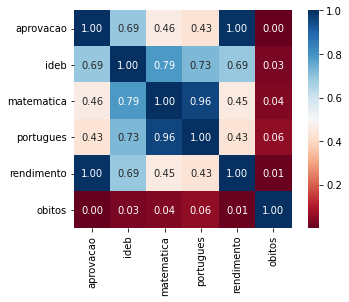

In [217]:
sns.heatmap(corr_df, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### Cálculo do Indicador de Mortalidade

Aparentemente tudo conforme o senso comum. Mas essa correlação muito forte pode ser advinda de alguma irregularidade da nossa variável `obitos`. Vamos tentar então calcular um índice de mortalidade, que seria:

* (`obitos` / `populacao`) * 100

In [218]:
df_sim_ponderado = pd.merge(left=df_sim,
                  right=df_ibge,
                  left_on='id',
                  right_on='cod',
                  how="inner")
df_sim_ponderado

,id,uf,obitos,cod,UF,populacao
0,1300029,AM,52,1300029,AM,16396
1,1300060,AM,28,1300060,AM,11934
2,1300086,AM,35,1300086,AM,14292
3,1300102,AM,44,1300102,AM,21937
4,1300144,AM,63,1300144,AM,22739
...,...,...,...,...,...,...
5565,4128625,PR,26,4128625,PR,2630
5566,4128633,PR,18,4128633,PR,5525
5567,4128658,PR,41,4128658,PR,4051
5568,4128708,PR,61,4128708,PR,6879


In [219]:
df_sim_ponderado['obitos_hab'] = (df_sim_ponderado['obitos'] / df_sim_ponderado['populacao'] ) * 100

df_sim_ponderado

,id,uf,obitos,cod,UF,populacao,obitos_hab
0,1300029,AM,52,1300029,AM,16396,0.317151
1,1300060,AM,28,1300060,AM,11934,0.234624
2,1300086,AM,35,1300086,AM,14292,0.244892
3,1300102,AM,44,1300102,AM,21937,0.200574
4,1300144,AM,63,1300144,AM,22739,0.277057
...,...,...,...,...,...,...,...
5565,4128625,PR,26,4128625,PR,2630,0.988593
5566,4128633,PR,18,4128633,PR,5525,0.325792
5567,4128658,PR,41,4128658,PR,4051,1.012096
5568,4128708,PR,61,4128708,PR,6879,0.886757


In [220]:
df_ponderado = pd.merge(left=df_sim_ponderado,
                  right=df_ideb_agreg,
                  left_on='id',
                  right_on='id',
                  how="inner")
df_ponderado

,id,uf_x,obitos,cod,UF,populacao,obitos_hab,uf_y,aprovacao,ideb,matematica,portugues,rendimento
0,1300029,AM,52,1300029,AM,16396,0.317151,AM,79.987500,3.442857,213.291429,208.242857,0.803998
1,1300060,AM,28,1300060,AM,11934,0.234624,AM,85.137500,3.871429,220.445714,214.824286,0.844407
2,1300086,AM,35,1300086,AM,14292,0.244892,AM,93.225000,4.562500,227.503750,229.457500,0.931645
3,1300102,AM,44,1300102,AM,21937,0.200574,AM,90.050000,4.650000,239.748750,236.845000,0.901323
4,1300144,AM,63,1300144,AM,22739,0.277057,AM,86.275000,4.487500,242.387500,233.841250,0.865071
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,4128625,PR,26,4128625,PR,2630,0.988593,PR,92.900000,4.866667,248.590000,240.876667,0.932863
5562,4128633,PR,18,4128633,PR,5525,0.325792,PR,93.333333,4.666667,242.473333,235.423333,0.936136
5563,4128658,PR,41,4128658,PR,4051,1.012096,PR,98.033333,6.266667,290.736667,273.786667,0.981089
5564,4128708,PR,61,4128708,PR,6879,0.886757,PR,94.733333,5.500000,269.023333,255.526667,0.949129


Pronto! Estamos agora com o nosso Dataframe atualizado. Vamos verificar se há novamente uma correlação entre as variáveis.

### Correlação ponderada

In [221]:
corr_df_pond = df_ponderado[['aprovacao', 'ideb', 'matematica', 'portugues', 'rendimento', 'obitos_hab']].corr()

display(corr_df_pond)

,aprovacao,ideb,matematica,portugues,rendimento,obitos_hab
aprovacao,1.000000,0.692492,0.458634,0.434024,0.995872,0.144277
ideb,0.692492,1.000000,0.788224,0.725772,0.689379,0.310317
matematica,0.458634,0.788224,1.000000,0.960775,0.454050,0.331638
portugues,0.434024,0.725772,0.960775,1.000000,0.430936,0.314398
rendimento,0.995872,0.689379,0.454050,0.430936,1.000000,0.136611
obitos_hab,0.144277,0.310317,0.331638,0.314398,0.136611,1.000000


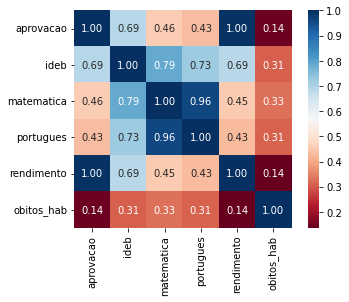

In [222]:
sns.heatmap(corr_df_pond, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Muito interessante conseguir mostrar que mesmo agora com nosso índice possuímos uma **correlação negativa** entre a `Taxa de Aprovação` do ensino das escolas com `Mortalidade`. Vale também mostrar que mesmo assim ainda mostramos uma correlação negativa entre os indicadores educacionais e o número de óbitos dos municípios, no entanto, com resultados mais próximos da normalidade.